This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

**All-ones or all-zeros tensors**

In [48]:
import tensorflow as tf
x = tf.ones(shape=(3, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]
 [1.]], shape=(3, 1), dtype=float32)


In [49]:
x = tf.zeros(shape=(3, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]
 [0.]], shape=(3, 1), dtype=float32)


**Random tensors**

In [50]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[0.24216637]
 [0.23359028]
 [0.79990155]], shape=(3, 1), dtype=float32)


In [51]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.92321277]
 [0.5870681 ]
 [0.9399035 ]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [52]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**Creating a TensorFlow variable**

In [53]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.18236375],
       [0.08848816],
       [1.1182958 ]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [54]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [55]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [56]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [57]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [58]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [59]:
x = tf.Variable(3.)
with tf.GradientTape() as t:
  y = x**2
  dy_dx = t.gradient(y,x)

x,y,dy_dx

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

**Using `GradientTape` with constant tensor inputs**

In [60]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [61]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [62]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [63]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [64]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

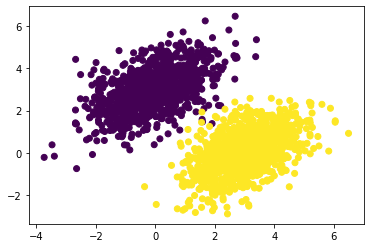

In [65]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [66]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [67]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [68]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [69]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [70]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.8283
Loss at step 1: 0.1932
Loss at step 2: 0.1147
Loss at step 3: 0.0988
Loss at step 4: 0.0912
Loss at step 5: 0.0853
Loss at step 6: 0.0799
Loss at step 7: 0.0750
Loss at step 8: 0.0706
Loss at step 9: 0.0666
Loss at step 10: 0.0629
Loss at step 11: 0.0595
Loss at step 12: 0.0565
Loss at step 13: 0.0537
Loss at step 14: 0.0511
Loss at step 15: 0.0488
Loss at step 16: 0.0467
Loss at step 17: 0.0448
Loss at step 18: 0.0430
Loss at step 19: 0.0414
Loss at step 20: 0.0400
Loss at step 21: 0.0386
Loss at step 22: 0.0374
Loss at step 23: 0.0363
Loss at step 24: 0.0353
Loss at step 25: 0.0344
Loss at step 26: 0.0335
Loss at step 27: 0.0328
Loss at step 28: 0.0321
Loss at step 29: 0.0314
Loss at step 30: 0.0309
Loss at step 31: 0.0303
Loss at step 32: 0.0299
Loss at step 33: 0.0294
Loss at step 34: 0.0290
Loss at step 35: 0.0287
Loss at step 36: 0.0283
Loss at step 37: 0.0280
Loss at step 38: 0.0277
Loss at step 39: 0.0275


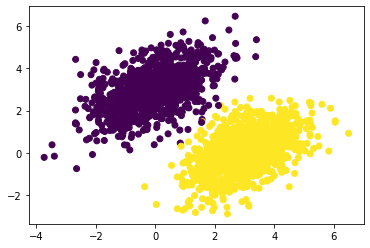

In [71]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

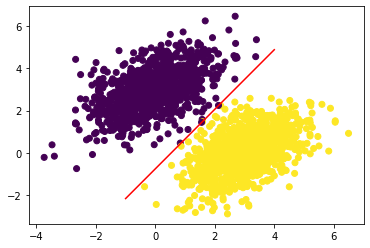

In [72]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [73]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [74]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [75]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [76]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [77]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [78]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [79]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [80]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 2ms/step - loss: 4.5279 - binary_accuracy: 0.9625
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 4.2802 - binary_accuracy: 0.9615
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 4.0737 - binary_accuracy: 0.9595
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 3.8736 - binary_accuracy: 0.9595
Epoch 5/5
16/16 [==============================] - 0s 1ms/step - loss: 3.6803 - binary_accuracy: 0.9590


In [81]:
history.history

{'loss': [4.527939319610596,
  4.280182361602783,
  4.073671817779541,
  3.873561143875122,
  3.6802992820739746],
 'binary_accuracy': [0.9624999761581421,
  0.9614999890327454,
  0.9595000147819519,
  0.9595000147819519,
  0.9589999914169312]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [82]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 4ms/step - loss: 0.1175 - binary_accuracy: 0.9343 - val_loss: 0.0812 - val_binary_accuracy: 0.9350
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0756 - binary_accuracy: 0.9493 - val_loss: 0.0802 - val_binary_accuracy: 0.9567
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0738 - binary_accuracy: 0.9536 - val_loss: 0.0329 - val_binary_accuracy: 0.9967
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0756 - binary_accuracy: 0.9557 - val_loss: 0.0261 - val_binary_accuracy: 0.9983
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0752 - binary_accuracy: 0.9621 - val_loss: 0.0303 - val_binary_accuracy: 0.9967


### Inference: Using a model after training

In [83]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[ 0.7102181 ]
 [ 0.9290112 ]
 [ 0.95374703]
 [ 0.82496136]
 [ 0.10018599]
 [ 0.13421816]
 [ 0.94111186]
 [ 0.67857033]
 [-0.04807705]
 [ 0.8697647 ]]


## Summary

嘗試各種微分，跟學習循環圖。